In [0]:
import numpy as np
from numpy import load
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [3]:

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

Using TensorFlow backend.


In [4]:
#unpack data from source

data = np.load('./drive/My Drive/Colab Notebooks/data/csci4622_kaggle3/train_and_test.npz')  #what kind of file is this? zipped np.array file
type(data)

X = [data[key] for key in data]  #??? why does this work? "data" is not a dictionary data type but a NpzFile type

print('len of X = ', len(X))  #there are three separate np arrays in the list: 1) train data 2) train labels 3) test data, no labels
print(type(X[0]))

xtrain0 = X[0]
ytrain0 = X[1]  #ytrain0 contains values between 0-42; so 43 categories
xtest0 = X[2]   #this is test data for final kaggle submission

print(xtrain0.shape)
print(ytrain0.shape)
print(xtest0.shape)

len of X =  3
<class 'numpy.ndarray'>
(39209, 32, 32, 3)
(39209,)
(12630, 32, 32, 3)


In [5]:
np.max(ytrain0)

42

In [6]:
#preprocess data - normalize input; divide all data by max pixel value, 255 ; we might also consider z normalization

#hot encode the labels
ymax = np.max(ytrain0)
ytrain = tf.keras.utils.to_categorical(ytrain0, ymax+1)

maxpixel_val = np.max(xtrain0) 
xtrain = xtrain0/maxpixel_val
xtest = xtest0/maxpixel_val  #we should shuffle before making predictions

x_tr, x_tst, y_tr, y_tst = train_test_split(xtrain, ytrain, test_size = 0.33,shuffle = True)  #results overfit if data is not shuffled!!!
print(x_tr.shape)
print(y_tr.shape)
print(x_tst.shape)
print(y_tst.shape)



(26270, 32, 32, 3)
(26270, 43)
(12939, 32, 32, 3)
(12939, 43)


In [7]:
print(ytrain0[0])  #before and after hot encoding
print(ytrain[0])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#build model -  this is a function to build the model where activation type and batch
#normalization can be specified as parameters so models can be changed without retyping

def build_model(activation, batch_normalization = False):
    model = Sequential()
    model.add(Conv2D(8, (3,3), activation = activation, padding = 'same', name = 'conv1', 
                    input_shape = (32,32,3))) 
    if batch_normalization: 
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2), name = 'maxpool1')) 
    model.add(Conv2D(16, (3,3), activation = activation, padding = 'same', name = 'conv2' ))
    if batch_normalization: 
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2), name = 'maxpool2'))

#    model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', name = 'conv3'))
#    if batch_normalization: 
#        model.add(BatchNormalization())
#    model.add(MaxPooling2D((2,2), name = 'maxpool3'))
#    model.add(Conv2D(32, (3, 3), activation=activation, padding='same', name='conv_4'))
#    if batch_normalization: 
#        model.add(BatchNormalization())
#    model.add(MaxPooling2D((2, 2), name='maxpool_4'))

    model.add(Flatten())
    #model.add(Dropout(0.5))
    model.add(Dense(64, activation=activation, name='dense_1'))

#    if batch_normalization: 
#        model.add(BatchNormalization())
#    model.add(Dense(32, activation=activation, name='dense_2'))

    model.add(Dense(43, activation='softmax', name='output'))  #there are 43 labels
    return model

In [23]:
model = build_model(activation = 'sigmoid', batch_normalization = False)  # try 'relu' too
opt = tf.keras.optimizers.SGD(learning_rate = .1, momentum = 0.0, nesterov=False)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 8)         224       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 16, 16, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 16)        1168      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
output (Dense)               (None, 43)               

In [11]:
model.fit(x_tr, y_tr, epochs = 20, validation_data= (x_tst, y_tst))

Train on 26270 samples, validate on 12939 samples
Epoch 1/20
26270/26270 [==============================] - 11s 412us/step - loss: 3.5086 - accuracy: 0.0542 - val_loss: 3.4866 - val_accuracy: 0.0560
Epoch 2/20
26270/26270 [==============================] - 5s 173us/step - loss: 3.4912 - accuracy: 0.0621 - val_loss: 3.4629 - val_accuracy: 0.0559
Epoch 3/20
26270/26270 [==============================] - 5s 172us/step - loss: 3.4104 - accuracy: 0.0887 - val_loss: 3.3586 - val_accuracy: 0.1005
Epoch 4/20
26270/26270 [==============================] - 5s 171us/step - loss: 3.3214 - accuracy: 0.1025 - val_loss: 3.2523 - val_accuracy: 0.1221
Epoch 5/20
26270/26270 [==============================] - 5s 174us/step - loss: 3.1281 - accuracy: 0.1643 - val_loss: 2.8921 - val_accuracy: 0.2360
Epoch 6/20
26270/26270 [==============================] - 5s 172us/step - loss: 2.4925 - accuracy: 0.3195 - val_loss: 2.1246 - val_accuracy: 0.3840
Epoch 7/20
26270/26270 [==============================] - 5s 

In [12]:
loss, accuracy = model.evaluate(x_tst, y_tst)
print('Test accuracy: %.4f' % (accuracy))

12939/12939 [==============================] - 1s 91us/step
Test accuracy: 0.9154


##below is for error checking and visualization

In [13]:
yhat = model.predict(x_tst, verbose = True)

12939/12939 [==============================] - 1s 62us/step


In [0]:
y_TST = [np.argmax(y_tst[i]) for i in range(len(y_tst))]

In [15]:
y_TST[0:5]

[31, 13, 1, 9, 11]

In [16]:
y_tst[0:5]  #y_TST and y_tst both check 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_HAT = [np.argmax(yhat[i]) for i in range(len(yhat))]

In [18]:
y_HAT[0:5]

[31, 13, 1, 9, 11]

(array([2625., 1669., 2325., 1354.,  961.,  965.,  522.,  737.,  746.,
        1035.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 10 Patch objects>)

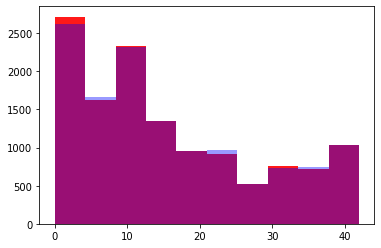

In [19]:

plt.hist(y_HAT, color = 'r', alpha = 0.9)
plt.hist(y_TST, color='b', alpha = 0.4)

missclassification can be seen in the non overlapping areas; magenta is common, blue and red areas are misclassification


In [20]:

y_HAT[0:5]
np.max(np.array(y_HAT))
set(y_HAT)
len(y_HAT)

12939

In [21]:
y_TST[0:5]
np.max(np.array(y_TST))
set(y_TST)
len(y_TST)

12939